### Applying a neural network to a business problem### 
Part 1: Classification problem

In [2]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Import dataset
df = pd.read_csv('Mamo_data.csv', delimiter = ",")

In [4]:
import pandas as pd

data = pd.read_csv('Mamo_data.csv')

# Check the shape of the dataset (rows, columns)
data_shape = data.shape
print(f"Dataset shape (rows, columns): {data_shape}")

# Alternatively, to just check the number of rows
num_rows = len(data)
print(f"Number of rows: {num_rows}")

print(data.head())


Dataset shape (rows, columns): (830, 11)
Number of rows: 830
   malignanttrue  score  age  shape2  shape3  shape4  margin2  margin3  \
0              0      0   45       1       0       0        0        0   
1              1      0   69       0       0       1        0        0   
2              0      0   58       0       0       1        0        0   
3              1      0   72       0       0       1        0        1   
4              1      0   71       0       0       1        0        0   

   margin4  margin5  density  
0        1        0        3  
1        0        1        3  
2        1        0        3  
3        0        0        3  
4        1        0        3  


In [5]:
import pandas as pd

data = pd.read_csv('Mamo_data.csv')

# Display the column names (feature names)
print("Feature names (column names):")
print(data.columns)

# Display the data types of each feature
print("\nData types of each feature:")
print(data.dtypes)

# Alternatively, you can use the 'info()' function for more detailed information
print("\nDetailed information about the dataset:")
print(data.info())


Feature names (column names):
Index(['malignanttrue', 'score', 'age', 'shape2', 'shape3', 'shape4',
       'margin2', 'margin3', 'margin4', 'margin5', 'density'],
      dtype='object')

Data types of each feature:
malignanttrue    int64
score            int64
age              int64
shape2           int64
shape3           int64
shape4           int64
margin2          int64
margin3          int64
margin4          int64
margin5          int64
density          int64
dtype: object

Detailed information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   malignanttrue  830 non-null    int64
 1   score          830 non-null    int64
 2   age            830 non-null    int64
 3   shape2         830 non-null    int64
 4   shape3         830 non-null    int64
 5   shape4         830 non-null    int64
 6   margin2        830 non-null    i

Choose malignanttrue as the y variable, and the rest of the variables except the unnamed column as X variables. Note: For the response variable, 0 = FALSE (normal) and 1 = TRUE (malignant).

In [7]:
import pandas as pd

data = pd.read_csv('Mamo_data.csv')

# Splitting of data into features (X) and target/response (y)
X = data.drop('malignanttrue', axis=1)  # All columns except 'target'
y = data['malignanttrue']  # Target column

# Checking of the shapes of X and y to verify the split
print(f"Features shape (X): {X.shape}")
print(f"malignanttrue shape (y): {y.shape}")


Features shape (X): (830, 10)
malignanttrue shape (y): (830,)


In [8]:
import pandas as pd

data = pd.read_csv('Mamo_data.csv')

# View 10 randomly sampled records from the dataset
# Setting random_state ensures that the same random sample is selected each time
sample_data = data.sample(10, random_state=0)

# Display the randomly sampled records
print(sample_data)


     malignanttrue  score  age  shape2  shape3  shape4  margin2  margin3  \
647              1      5   66       0       0       1        0        0   
31               0      3   49       0       0       1        0        0   
474              0      4   48       0       0       1        0        0   
8                0      2   23       0       0       0        0        0   
382              1      4   46       0       1       0        0        0   
255              1      4   50       1       0       0        0        0   
672              1      5   74       0       0       1        0        1   
679              1      5   74       0       0       1        0        0   
196              0      4   70       0       0       0        0        0   
652              1      5   54       0       0       1        0        0   

     margin4  margin5  density  
647        1        0        3  
31         1        0        3  
474        0        1        3  
8          0        0        3 

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('Mamo_data.csv')

y = data['malignanttrue']  

# Convert to a contiguous flattened array using numpy's ravel() method
y_flattened = y.values.ravel()

# Display the flattened array
print(y_flattened)


[0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 1 1 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Mamo_data.csv')

# Splitting the data into features (X) and target (y)
X = data.drop('malignanttrue', axis=1)  # Replace 'target' with the actual target column name
y = data['malignanttrue']  # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Displaying of the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (664, 10), y_train: (664,)
Testing set shape: X_test: (166, 10), y_test: (166,)


Scale the data in the next cell.
Use the variable names X_train and X_test.

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('Mamo_data.csv')

# Split data into features (X) and target (y)
X = data.drop('malignanttrue', axis=1)  # Replace 'target' with the actual target column name
y = data['malignanttrue']  # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Applying the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the scaled data
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")


Scaled training data shape: (664, 10)
Scaled test data shape: (166, 10)


Next, fit a two-layer MLP classifier with 5 nodes on each layer.

In [14]:
reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=(5,5), random_state=1)
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)
    
# Accuracy before model parameter optimisation
accuracy_score(y_pred,y_test)

0.5240963855421686

Can you get a better accuracy? More nodes on each layer could lead to overfitting. Fewer nodes could make the model too sparse. Use cross validation to find the optimal number of nodes per layer.

In [16]:
# Fit and check accuracy for various numbers of nodes on both layers
validation_scores = {}
print("Nodes |Validation")
print("      | score")

for hidden_layer_size in [(i,j) for i in range(3,6) for j in range(3,6)]:

    reg = MLPClassifier(max_iter=1000, hidden_layer_sizes=hidden_layer_size, random_state=1)

    score = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=2)
    validation_scores[hidden_layer_size] = score.mean()
    print(hidden_layer_size, ": %0.5f" % validation_scores[hidden_layer_size])

Nodes |Validation
      | score
(3, 3) : 0.50000
(3, 4) : 0.51205
(3, 5) : 0.48795
(4, 3) : 0.48795
(4, 4) : 0.48795
(4, 5) : 0.51205


C:\Users\katsh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\katsh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


(5, 3) : 0.80572
(5, 4) : 0.48494
(5, 5) : 0.51205


In [17]:
# Checking of scores
print("The highest validation score is: %0.4f" % max(validation_scores.values()))  
optimal_hidden_layer_size = [name for name, score in validation_scores.items() 
                              if score==max(validation_scores.values())][0]
print("This corresponds to nodes", optimal_hidden_layer_size )

The highest validation score is: 0.8057
This corresponds to nodes (5, 3)


Use the tuple that was printed for `optimal_hidden_layer_sizes` to construct the first of two lines of code to fit data with the best parameter.
For the first line, complete the following code in the code cell below: 
```
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(?,?), random_state=1)
```

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('Mamo_data.csv')

# Splitting the data into features (X) and target (y)
X = data.drop('malignanttrue', axis=1)  # Replace 'target' with the actual target column name
y = data['malignanttrue']  # Target column

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPClassifier with best parameters
mlp = MLPClassifier(hidden_layer_sizes=(100,),  # Example: 100 neurons in the hidden layer
                    activation='relu',  # Activation function
                    solver='adam',  # Optimizer
                    learning_rate_init=0.001,  # Learning rate
                    max_iter=500,  # Number of iterations
                    random_state=0)

# Fit the model to the training data
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")


Accuracy of the model: 0.81


C:\Users\katsh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
# Predict
y_pred = mlp.predict(X_test_scaled)
# Accuracy 
accuracy_score(y_pred,y_test)

0.8132530120481928

For the response curves, categorical variables should be fixed at distinct values. By fixing the margin variable at its first unique value, its second unique value, and so on, the response curves show the effect for various levels of the margin variable.

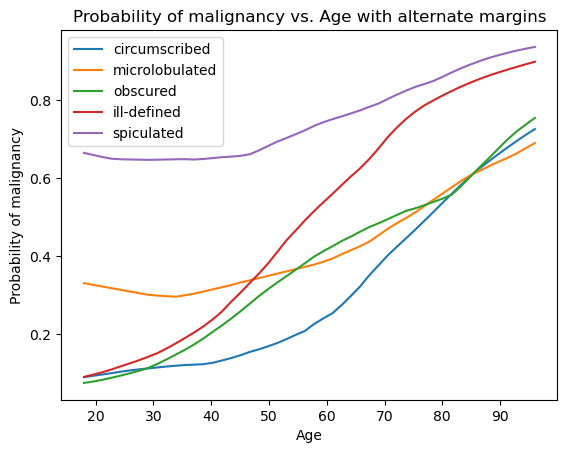

In [22]:
X_design = X.copy()
X_design_vec = pd.DataFrame(X_design.mean()).transpose()

# Different probabilities for different margins
margin= range(4,9)

for i in margin: 
    X_design_vec.loc[0,["margin2","margin3","margin4","margin5"]]=[0,0,0,0]
    if i!=4:
        X_design_vec.iloc[0,i]=1
    
    # Finding the min and max of the desired feature and setting up a sequence
    min_resultant = min(X.loc[:,"age"])
    max_resultant = max(X.loc[:,"age"])
    seq = np.linspace(start=min_resultant,stop=max_resultant,num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0,"age"] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = mlp.predict_proba(to_predict)

    # Plot 
    plt.plot(seq,predictions[:,1])
plt.xlabel("Age")
plt.ylabel("Probability of malignancy")
plt.title("Probability of malignancy vs. Age with alternate margins")
plt.legend(labels=["circumscribed","microlobulated","obscured","ill-defined","spiculated"],loc='best')
plt.show()

Question 1

The biomedical industry uses machinery to capture images and other data, and also software that provides the specialist with information to make decisions. These software applications often use vast data sets such as the mammogram data set you used in the notebook.

Consider the medical data and the context in which it is used. Why is machine learning, and specifically neural networks, an appropriate method for prediction in these circumstances?

Answer:

Medical data, such as mammogram images, often contains intricate patterns that are challenging for traditional statistical methods to discern. Neural networks, especially deep learning architectures, can automatically learn and extract features from large datasets, making them adept at identifying subtle distinctions in medical images.

Neural networks can effectively manage high-dimensional data, where numerous features (such as pixel values in images) may contribute to the outcome. This capability allows for comprehensive analysis, improving the accuracy of predictions regarding malignancies.

Neural networks can generalize well from training data to unseen cases, which is crucial in medical applications where variability in patient data is common. Their ability to adapt through training with large datasets helps mitigate overfitting and enhances predictive performance.

The use of neural networks in clinical settings provides specialists with data-driven insights, augmenting their decision-making process. This integration can lead to more accurate diagnoses, timely interventions, and ultimately improved patient outcomes, reinforcing the value of machine learning in the healthcare domain.

Question2

What is the purpose of a response curve in the context of neural networks? What insights can be gained from the response curves you generated in this IDE notebook? 

Firstly, the impact of Age on Malignancy Risk: 
By plotting the probability of malignancy against age, I can observe how the risk fluctuates with advancing age. Such insights are vital for identifying age-related trends in cancer risk.

Secondly the margin effects: 
The curves corresponding to different margins allow for a comparative analysis of how these thresholds affect the model's predictions. This can highlight the relative importance of different margins in determining malignancy probabilities, guiding clinical decisions on screening protocols.

And finally, risk stratification: 
The curves aid in stratifying patients based on their age and the associated risk of malignancy, facilitating targeted interventions and personalized patient management strategies.

### Part 2: Use Python to perform K-means clustering to inform a business case

In [28]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as sns
import numpy as np

In [29]:
# Import dataset
df = pd.read_csv("online_shoppers_intention.csv",delimiter=",")

# Remove NaN
nr_samples_before = df.shape[0]
df = df.dropna()
print('Removed %s samples' % (nr_samples_before - df.shape[0]))

# Size of the data set after removing NaN
print(df.shape)

Removed 14 samples
(12316, 18)


In [30]:
df.sample(8)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3084,0.0,0.000000,0.0,0.000000,58.0,2665.798039,0.007143,0.027289,0.000000,0.8,May,2,2,3,4,Returning_Visitor,False,False
5185,9.0,134.766667,0.0,0.000000,17.0,347.547619,0.024242,0.042121,0.000000,0.0,May,3,2,4,4,Returning_Visitor,False,False
7327,3.0,94.000000,2.0,44.200000,56.0,1430.208205,0.020000,0.030389,0.000000,0.0,Nov,2,2,9,3,Returning_Visitor,False,False
10988,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Nov,2,4,3,3,Returning_Visitor,False,False
10105,17.0,311.250000,4.0,428.547619,139.0,3891.214286,0.001974,0.011184,86.790826,0.0,Dec,2,2,1,6,Returning_Visitor,False,False
3317,0.0,0.000000,0.0,0.000000,14.0,354.250000,0.000000,0.015385,124.032000,0.0,May,1,1,6,5,New_Visitor,False,True
3217,3.0,69.166667,0.0,0.000000,35.0,869.061111,0.000000,0.006173,0.000000,0.8,May,2,2,1,2,Returning_Visitor,False,False
845,4.0,64.333333,1.0,13.000000,27.0,1433.916667,0.000000,0.018227,3.691345,0.0,Mar,1,4,1,8,New_Visitor,False,True


In [31]:
print(df.dtypes)


Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [32]:
print(df.columns)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [33]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType              12

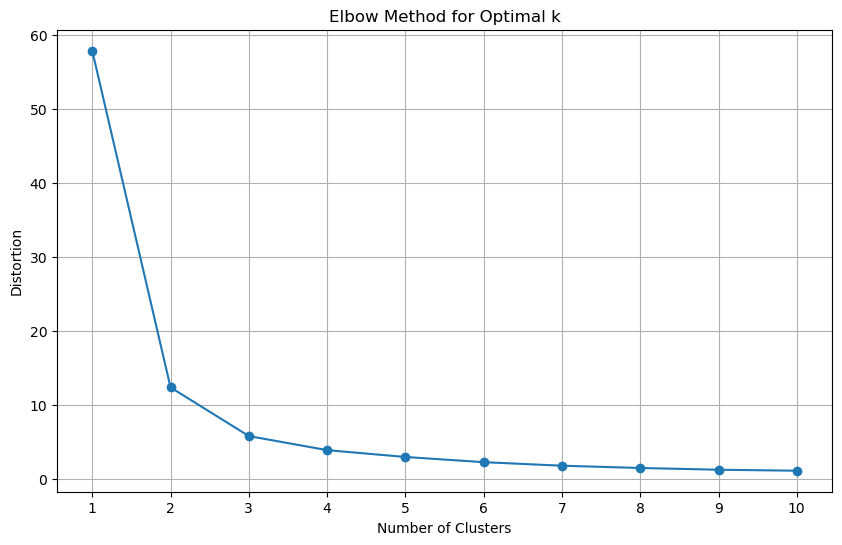

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X = df[['BounceRates', 'ExitRates']]

# Initialize the distortions list
distortions = []

# Define the range of clusters to test
range_clusters = range(1, 11) 

# Calculate distortions for each number of clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)  # Inertia is the distortion measure
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.xticks(range_clusters)
plt.grid()
plt.show()


[0.844172029088432, 0.6679359838860234, 0.5482914187983194, 0.5760412194785426, 0.5386093054286283, 0.5177985871887867, 0.48195671667824536, 0.46157511196190015, 0.46410391835647047]


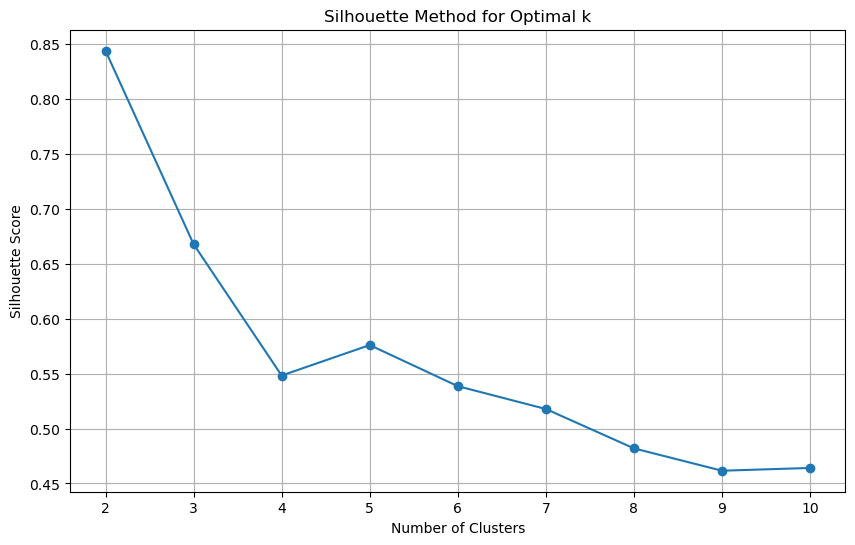

In [35]:
from sklearn.metrics import silhouette_score
# Initialize the list to store silhouette scores
sil = []

# Define the maximum number of clusters to test
kmax = 10

# Iterate over a range of clusters from 2 to kmax (minimum of 2 clusters for silhouette score)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  # Fit the model to the selected features
    score = silhouette_score(X, kmeans.labels_)  # Calculate the silhouette score
    sil.append(score)  # Append the score to the list

# Display the silhouette scores for each number of clusters
print(sil)
plt.figure(figsize=(10, 6))
plt.plot(range(2, kmax + 1), sil, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.xticks(range(2, kmax + 1))
plt.grid()
plt.show()


In [36]:
from sklearn.cluster import KMeans

# Set the number of clusters (choosing a value based on the Elbow or Silhouette method)
optimal_k = 3 

# Initialize KMeans with kmeans++ initialization
km = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Fit the model to the selected features (X)
km.fit(X)

# Get the cluster labels
cluster_labels = km.labels_

# Add the cluster labels to the original DataFrame for analysis
df['Cluster'] = cluster_labels

# Display the first few rows of the DataFrame with cluster labels
print(df.head())


   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

Cluster
2    9483
0    2020
1     813
Name: count, dtype: int64


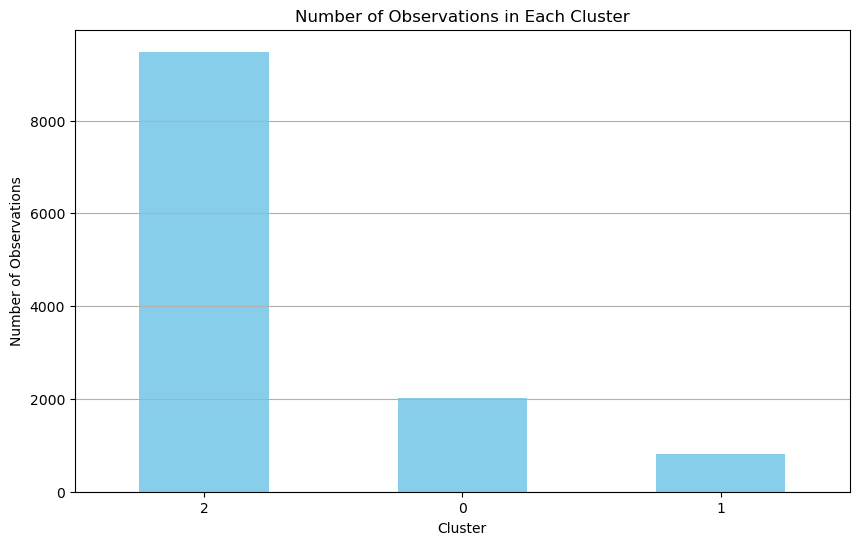

In [37]:
# Checking the distribution of observations in each cluster
cluster_distribution = df['Cluster'].value_counts()

# Displaying the distribution
print(cluster_distribution)

# Visualizing the distribution using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cluster_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.title('Number of Observations in Each Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [38]:
relevant_features = df[['Administrative', 'Administrative_Duration', 
                        'Informational', 'Informational_Duration', 
                        'ProductRelated', 'ProductRelated_Duration', 
                        'BounceRates', 'ExitRates', 'PageValues', 
                        'SpecialDay', 'Month', 'OperatingSystems', 
                        'Browser', 'Region', 'TrafficType', 
                        'VisitorType', 'Weekend', 'Revenue']]

# Create a new DataFrame with cluster allocations
clustered_df = relevant_features.copy()  # Copy the relevant features
clustered_df['Cluster'] = df['Cluster']  # Add the cluster labels

print(clustered_df.head())


   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [39]:
clustered_df.to_csv('clustered_data.csv', index=False)


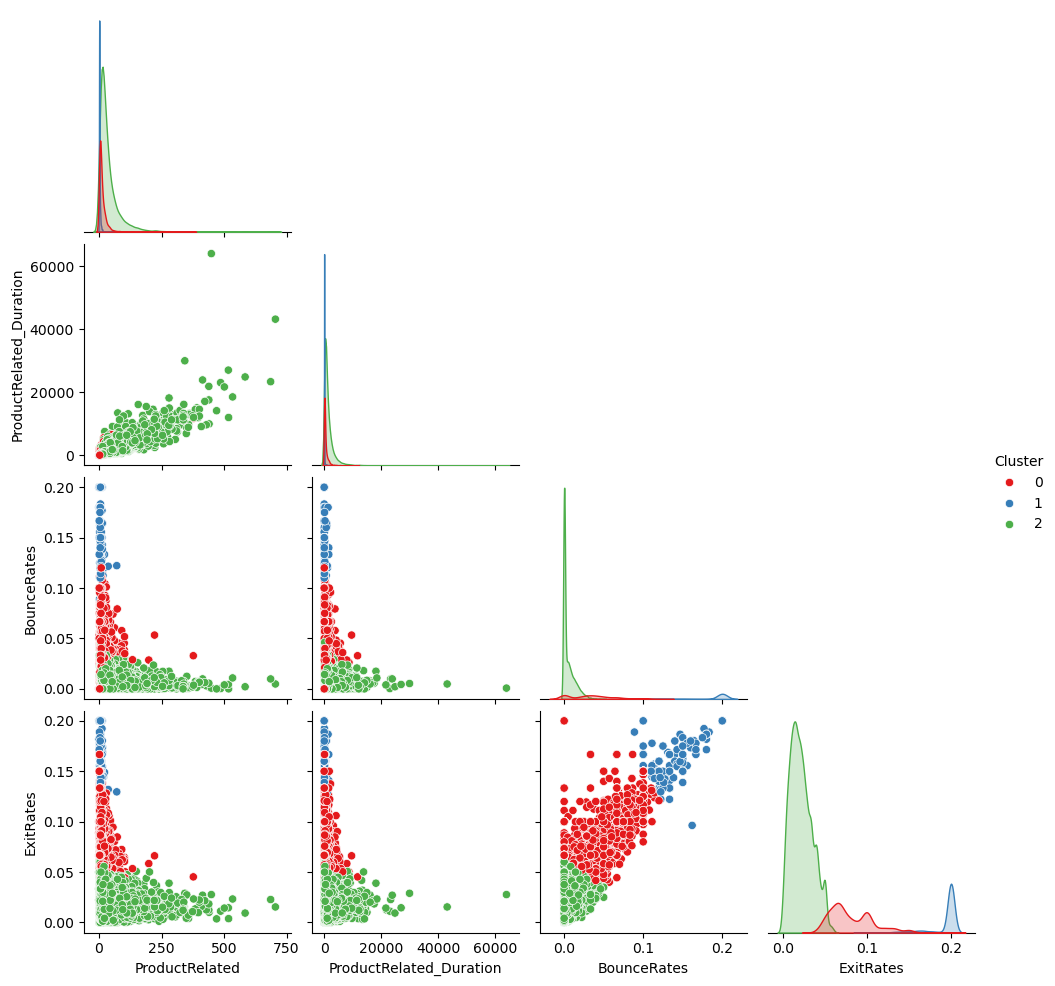

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the variables I want to plot and including the 'Cluster' column
plot_data = df[['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'Cluster']]

# Creating a pairplot, using 'Cluster' to color the data points
sns.pairplot(plot_data, hue='Cluster', palette='Set1', diag_kind='kde', corner=True)

plt.show()


#### Question 1	

At the end of the part 2, you created the pair-wise plots. Consider the behaviour of customers in each cluster based on the distribution and scatterplots related to the variable ProductRelated_Duration. 

- What insights can you gain from the scatterplots regarding the difference in behaviour of the different clusters? 

The first insight is the 'cluster distribution' as different clusters exhibit varying levels of interaction with product-related content. For some clusters, there is a concentrated distribution of lower ProductRelated_Duration values, indicating that these customers spend less time on product-related pages. This could imply that they are either quickly finding what they need or they are less engaged with browsing the site.

Secondly, the 'high-engagement clusters', a few clusters show higher values of ProductRelated_Duration, suggesting that these customers tend to spend significantly more time exploring product-related pages. This could indicate that these customers are more thorough in their browsing or are more interested in the offerings, possibly leading to higher conversion rates (purchases).

Furthermore, the scatterplots reveal that there are clear separations between clusters when it comes to the time spent on product-related pages. For instance, one cluster may display a concentrated range of lower ProductRelated_Duration values, while another shows a wider spread of higher durations. This suggests distinct browsing patterns where one group is more inclined toward shorter visits, while another tends to engage more deeply.

And finally, when combined with BounceRates and ExitRates, clusters with low ProductRelated_Duration tend to have higher bounce or exit rates, indicating that customers in these clusters are less likely to proceed with purchases or engage further. In contrast, clusters with higher ProductRelated_Duration often have lower bounce rates, reflecting more in-depth engagement with the site.

- Discuss the quality of the clustering solution by referring to the number of observations in each cluster and the distribution of the data along each dimension. How does this affect the way you can interpret the scatterplots?

Cluster Balance
- If the clusters are relatively balanced in size, it suggests that the algorithm has identified distinct groups of customers with different behaviors. However, if one cluster has a significantly higher number of observations than others, this could indicate that the algorithm is grouping a large portion of the data into a single cluster, possibly masking important behavioral nuances in smaller clusters.

Data Distribution
-The scatterplots reveal the spread of the data within each cluster across different dimensions. If the data within each cluster is tightly grouped along one dimension but more spread out along others, this suggests that certain dimensions (e.g., ProductRelated_Duration) are more influential in defining customer behavior than others. Uneven distribution along dimensions may complicate interpretation, as overlapping clusters make it harder to draw clear distinctions in behavior.

Impact on Interpretation
-The scatterplots are easier to interpret when clusters are well-separated and exhibit distinct patterns. Overlapping clusters, or clusters with a large variance in data distribution, reduce the clarity of insights, as similar behaviors might appear in different clusters. This affects the precision with which customer behavior can be categorized and acted upon.

#### Question 2
Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:

Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).

There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis?

The K-means algorithm is a reasonable choice for this dataset, but with some limitations. First, the number of observations (~12,000) fits well within the scope of K-means. The algorithm performs efficiently with medium-sized datasets, where there is enough data to form meaningful clusters without overwhelming computational resources. In comparison, with a significantly larger dataset (e.g., 900,000 observations), K-means might struggle with scalability, and the time required to converge might increase. However, since K-means performs well with moderate-sized datasets like this one, it remains a suitable option.

Second, K-means assumes that clusters are spherical and relatively equal in size, which may not always hold true. In this dataset, the presence of outliers could distort the clustering process. Outliers can pull the centroids away from the densest part of a cluster, leading to suboptimal clustering results. For example, customers with extremely high ProductRelated_Duration or BounceRates may be grouped into their own cluster or affect the position of the centroids for the other clusters. These outliers can negatively impact the interpretability and predictive capability of the analysis.

In conclusion, while K-means is effective for handling datasets of this size, the presence of outliers and the potential for unequal cluster sizes suggests that alternative clustering methods, such as DBSCAN or hierarchical clustering, may be worth exploring for better handling of non-spherical clusters and outliers.

#### Question 2
Discuss whether the K-means algorithm was an appropriate method for identifying clusters in this particular data set by referring to at least two elements of the data set that contributed to your decision.

The following are some elements that you could take into consideration to justify your answer:

Discuss the applicability of the K-means algorithm for the number of observations in the data set. Compare this data set with one that has substantially more observations (e.g. 900,000 vs the present 12,000).

There were some outliers in the data set. How do you think this can influence the predictive capability of the analysis? (Max. 300 words)

The K-means algorithm is a reasonable choice for this dataset, but with some limitations. First, the number of observations (~12,000) fits well within the scope of K-means. The algorithm performs efficiently with medium-sized datasets, where there is enough data to form meaningful clusters without overwhelming computational resources. In comparison, with a significantly larger dataset (e.g., 900,000 observations), K-means might struggle with scalability, and the time required to converge might increase. However, since K-means performs well with moderate-sized datasets like this one, it remains a suitable option.

Second, K-means assumes that clusters are spherical and relatively equal in size, which may not always hold true. In this dataset, the presence of outliers could distort the clustering process. Outliers can pull the centroids away from the densest part of a cluster, leading to suboptimal clustering results. For example, customers with extremely high ProductRelated_Duration or BounceRates may be grouped into their own cluster or affect the position of the centroids for the other clusters. These outliers can negatively impact the interpretability and predictive capability of the analysis.

In conclusion, while K-means is effective for handling datasets of this size, the presence of outliers and the potential for unequal cluster sizes suggests that alternative clustering methods, such as DBSCAN or hierarchical clustering, may be worth exploring for better handling of non-spherical clusters and outliers.